## Illustrations of inverse problems and ill-posedness  


Author: OJM.

In [120]:
import numpy as np
from scipy import signal

In [121]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

### Differentiation and integration

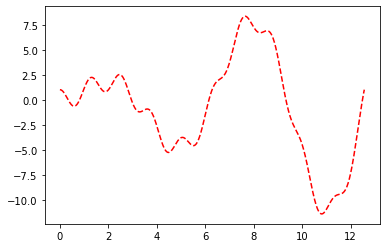

In [122]:
t = np.linspace(0,4*np.pi,1000)
x = t*np.sin(t)+np.cos(5*t)
plt.plot(t,x,'r--')
plt.show()

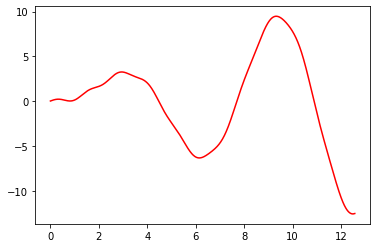

In [123]:
#built-in 'integration'
dt = 4*np.pi/1000.
plt.plot(t,np.cumsum(x)*dt,'r')
plt.show()

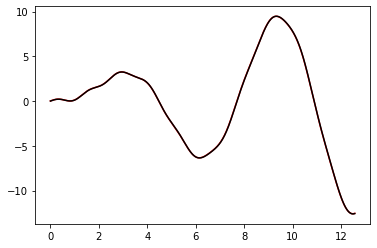

In [124]:
# compare to analytical integral
plt.plot(t,np.cumsum(x)*dt,'r')
plt.plot(t,np.sin(t)-t*np.cos(t) +(1./5)*np.sin(5*t),'k')
plt.show()

In [125]:
#forward mapping for integration (cumulative sum)
def create_fmap_int(d=1):
    A = np.zeros([d,d])
    for i in range(0,d):
        A[i,:i+1] = 1*dt
    return A

In [126]:
#create forward mapping
A = create_fmap_int(len(x))
print(A)

[[0.01256637 0.         0.         ... 0.         0.         0.        ]
 [0.01256637 0.01256637 0.         ... 0.         0.         0.        ]
 [0.01256637 0.01256637 0.01256637 ... 0.         0.         0.        ]
 ...
 [0.01256637 0.01256637 0.01256637 ... 0.01256637 0.         0.        ]
 [0.01256637 0.01256637 0.01256637 ... 0.01256637 0.01256637 0.        ]
 [0.01256637 0.01256637 0.01256637 ... 0.01256637 0.01256637 0.01256637]]


In [127]:
#calculate output of forward mapping
y = np.dot(A,x)

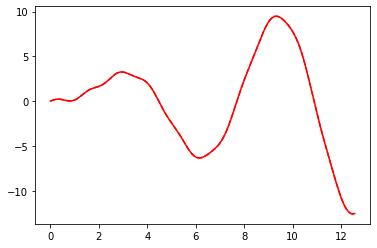

In [128]:
#compare our forward mapping to built-in
plt.plot(t,np.cumsum(x)*dt,'r--')
plt.plot(t,y,'r')
plt.show()

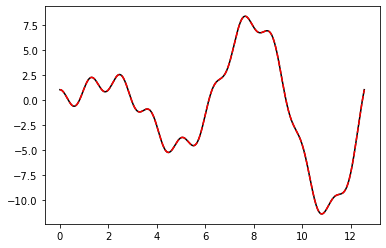

In [129]:
#invert noise-free case
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

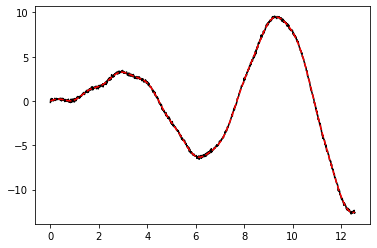

In [131]:
#add small noise
y_noisy = y+np.random.normal(0,0.1,size=len(y))
plt.plot(t,y_noisy,'k')
plt.plot(t,y,'r--')
plt.show()

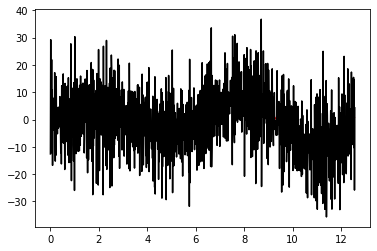

In [134]:
#invert noisy: very different
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y_noisy),'k')
plt.show()

In [135]:
#note: large condition number (ill-conditioned!)
np.linalg.cond(np.linalg.inv(A))

1273.8747253307806

### Convolution and deconvolution (blurring and deblurring)

In [136]:
#forward mapping for convolution
def create_fmap_con(n=4,d=1):
    weights = np.zeros(d)
    weights[0:n] = 1./n
    A = np.zeros([d,d])
    for i in range(0,d):
        A[i,:] = np.roll(weights,i-int(n/2))
    return A

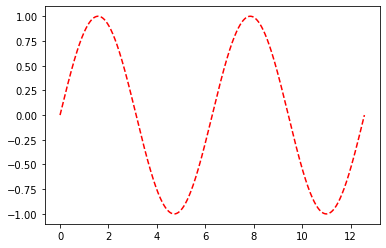

In [137]:
t = np.linspace(0,4*np.pi,1000)
x = np.sin(t)
plt.plot(t,x,'r--')
plt.show()

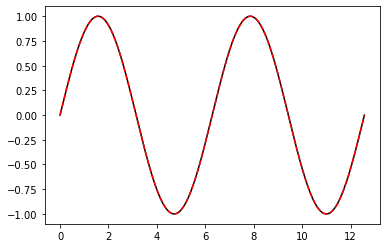

In [138]:
#create forward mapping for convolution
A = create_fmap_con(n=1,d=len(x))
y = np.dot(A,x)
plt.plot(t,x,'k')
plt.plot(t,y,'r--')
plt.show()

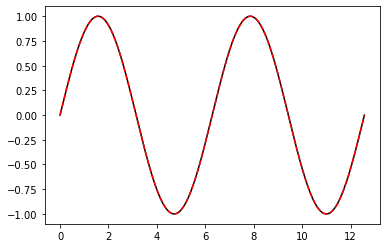

In [139]:
#invert noise-free case
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

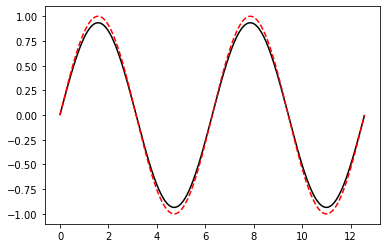

In [140]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/10+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

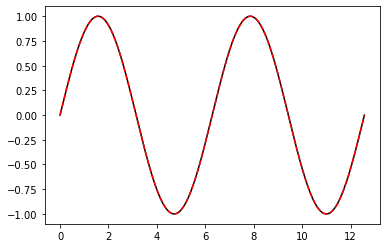

In [141]:
#invert noise-free
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

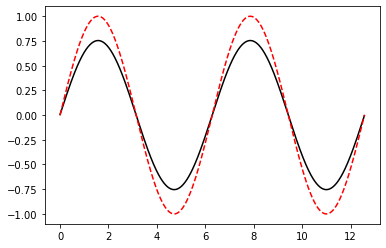

In [142]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/5+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

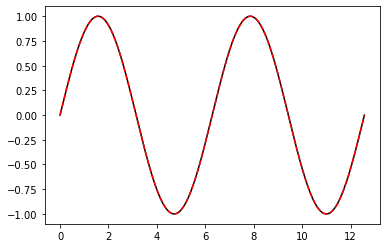

In [143]:
#invert noise-free
plt.plot(t,np.dot(np.linalg.inv(A),y),'k')
plt.plot(t,x,'r--')
plt.show()

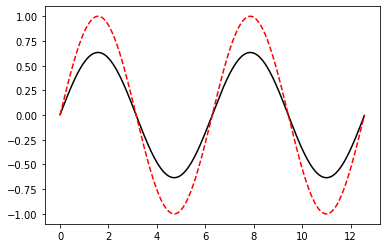

In [144]:
#create forward mapping for convolution with greater width of smoothing
A = create_fmap_con(n=int(len(x)/4+1),d=len(x))
y = np.dot(A,x)
plt.plot(t,y,'k')
plt.plot(t,x,'r--')
plt.show()

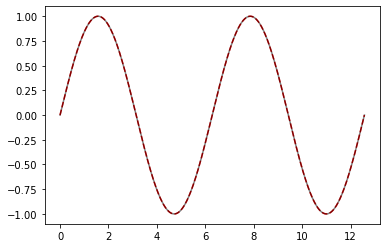

In [145]:
#invert noise-free
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y),'k',alpha=0.5)
plt.show()

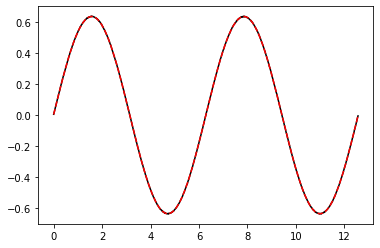

In [146]:
#add almost undetectable noise
y_noisy = y+np.random.normal(0,0.001,size=len(y))
plt.plot(t,y_noisy,'k')
plt.plot(t,y,'r--')
plt.show()

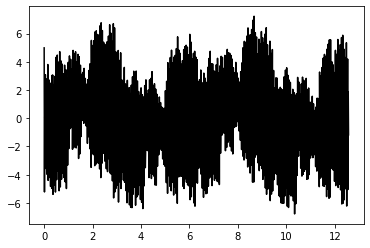

In [147]:
#invert noisy
plt.plot(t,x,'r--')
plt.plot(t,np.dot(np.linalg.inv(A),y_noisy),'k')
plt.show()

In [148]:
#note: large condition number (ill-conditioned!)
np.linalg.cond(np.linalg.inv(A))

56672.146780248346

In [149]:
#same as for A...
np.linalg.cond(A)

56672.14678021681

#### Extra: model resolution

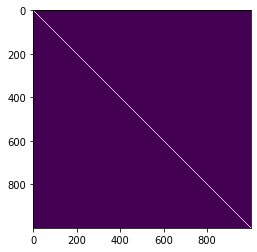

In [26]:
#Model resolution essentially identity
Apinv = np.linalg.pinv(A)
R_model = Apinv @ A
plt.imshow(R_model)
plt.show()

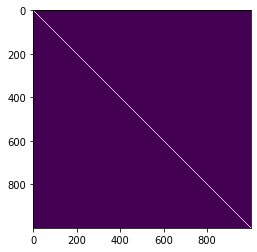

In [28]:
#Data resolution essentially identity
#Apinv = np.linalg.pinv(A)
R_data = A @ Apinv
plt.imshow(R_data)
plt.show()